In [50]:
import networkx as net
nx = net
import matplotlib.pyplot as plt
import os

In [8]:
os.getcwd()

'/Users/field/Desktop/CUNY/data_620/data_620_assignments'

In [9]:
os.listdir()

['SNABook',
 'social_network_analysis_for_startups_workbook.ipynb',
 'nltk_book_workbook.ipynb',
 '.venv',
 '.git',
 '.idea']

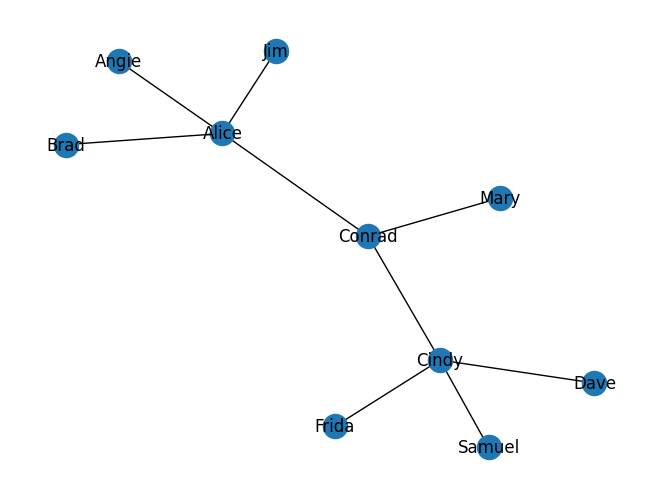

In [15]:
orgchart = net.read_pajek("SNABook/chapter1/ACME_orgchart.net")
net.draw(orgchart, with_labels=True)

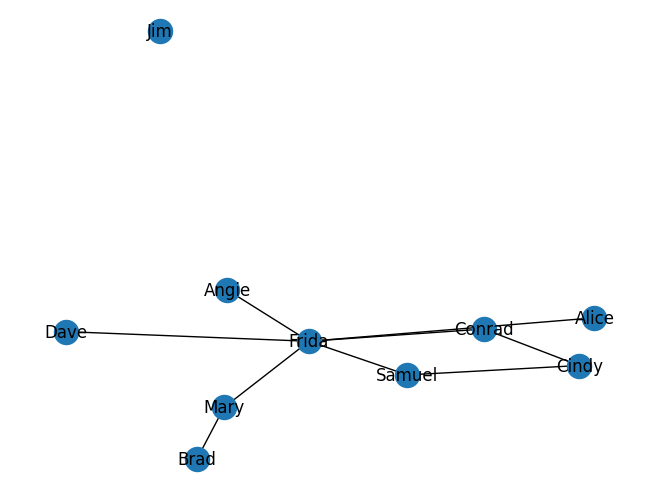

In [18]:
advice = net.read_pajek('SNABook/chapter1/ACME_advice.net')
net.draw(advice, with_labels=True)

# Chapter 2

In [136]:
import networkx.generators.small

g = networkx.generators.small.krackhardt_kite_graph()
g.number_of_edges()
g.number_of_nodes()
g.edges

EdgeView([(0, 1), (0, 2), (0, 3), (0, 5), (1, 3), (1, 4), (1, 6), (2, 3), (2, 5), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7), (7, 8), (8, 9)])

In [7]:
dir(g)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__networkx_backend__',
 '__networkx_cache__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_dict_factory',
 'nodes

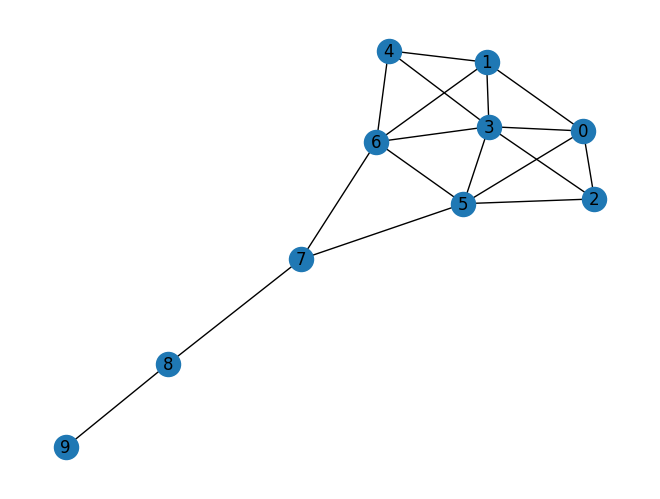

In [64]:
nx.draw(g, with_labels=True)

In [22]:
# Depth First Traversal or DFS

def DFS_nodes(graph, node, visited=[]):
    visited.append(node)
    for neighbor in graph[node]:
        if not neighbor in visited:
            DFS_nodes(graph, neighbor, visited)
    return visited

In [23]:
DFS_nodes(g, 0)

[0, 1, 3, 2, 5, 6, 4, 7, 8, 9]

In [29]:
def DFS_edges(graph, node, visited=[], edges=[]):
    visited.append(node)
    for ni in graph[node]:
        if not ni in visited:
            edges.append((node, ni))
            DFS_edges(graph, ni, visited, edges)
    return edges

In [30]:
DFS_edges(g, 0)

[(0, 1), (1, 3), (3, 2), (2, 5), (5, 6), (6, 4), (6, 7), (7, 8), (8, 9)]

In [35]:
edges = net.dfs_edges(g)
list(edges)

[(0, 1), (1, 3), (3, 2), (2, 5), (5, 6), (6, 4), (6, 7), (7, 8), (8, 9)]

In [39]:
from networkx.algorithms import traversal

edges = traversal.dfs_edges(g)
list(edges)

[(0, 1), (1, 3), (3, 2), (2, 5), (5, 6), (6, 4), (6, 7), (7, 8), (8, 9)]

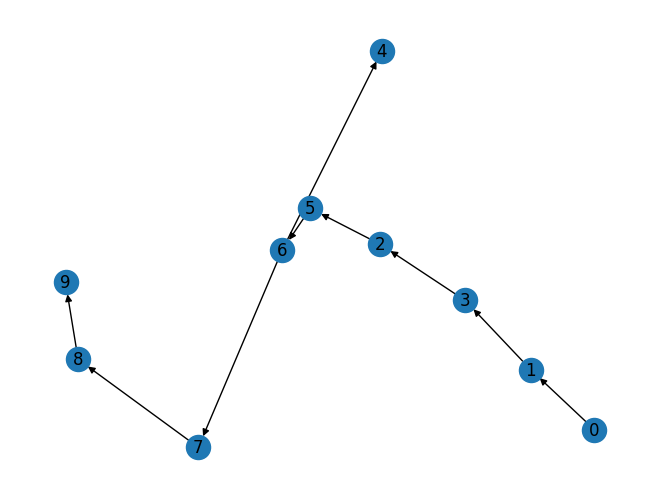

In [45]:
dfs_tree = net.dfs_tree(g)
net.draw(dfs_tree, with_labels=True)

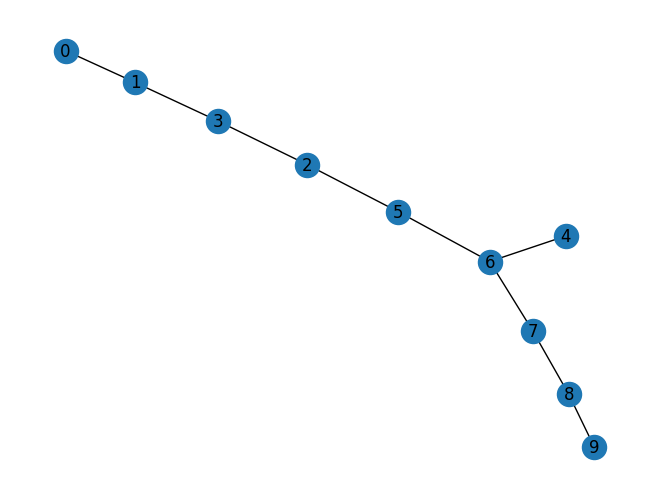

In [47]:
dfs_edges = list(net.dfs_edges(g))

dfs_graph = net.Graph()
dfs_graph.add_edges_from(dfs_edges)

net.draw(dfs_graph, with_labels=True)

In [51]:
nx.dfs_successors(g)

{0: [1], 1: [3], 3: [2], 2: [5], 5: [6], 6: [4, 7], 7: [8], 8: [9]}

In [53]:
nx.dfs_predecessors(g)

{1: 0, 3: 1, 2: 3, 5: 2, 6: 5, 4: 6, 7: 6, 8: 7, 9: 8}

In [60]:
tree = nx.dfs_tree(g)
tree
list(tree.successors(0))
tree.succ

AdjacencyView({0: {1: {}}, 1: {3: {}}, 2: {5: {}}, 3: {2: {}}, 4: {}, 5: {6: {}}, 6: {4: {}, 7: {}}, 7: {8: {}}, 8: {9: {}}, 9: {}})

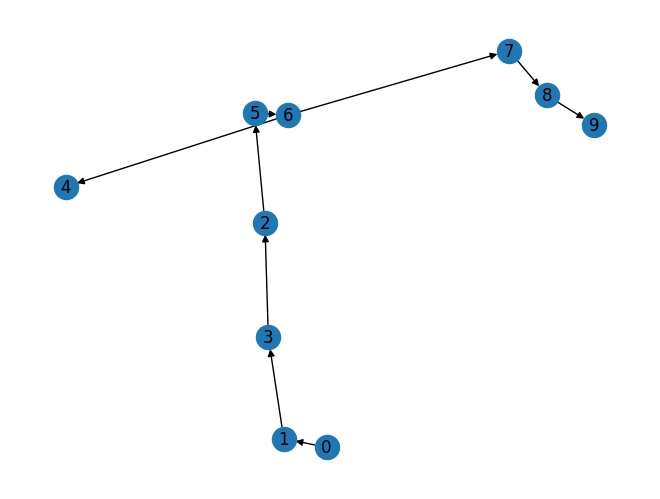

In [61]:
nx.draw(tree, with_labels=True)

In [ ]:
# breadth first traversal (BFS)

In [70]:
edges = nx.bfs_edges(g, 0)
list(edges)
tree = nx.bfs_tree(g,0)
tree
list(nx.bfs_successors(g, 0))
list(nx.dfs_successors(g, 0))

[0, 1, 3, 2, 5, 6, 7, 8]

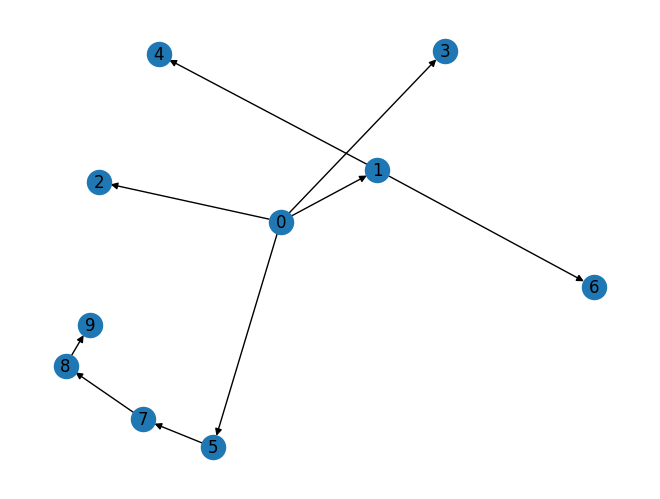

In [71]:
nx.draw(tree, with_labels=True)

In [73]:
from networkx import algorithms as algo

In [75]:
algo.shortest_path(g,0,5)

[0, 5]

In [76]:
algo.shortest_path(g, 0, 7)

[0, 5, 7]

In [77]:
algo.average_shortest_path_length(g)

1.9777777777777779

In [84]:
list(algo.all_pairs_shortest_path(g))

[(0,
  {0: [0],
   1: [0, 1],
   2: [0, 2],
   3: [0, 3],
   5: [0, 5],
   4: [0, 1, 4],
   6: [0, 1, 6],
   7: [0, 5, 7],
   8: [0, 5, 7, 8],
   9: [0, 5, 7, 8, 9]}),
 (1,
  {1: [1],
   0: [1, 0],
   3: [1, 3],
   4: [1, 4],
   6: [1, 6],
   2: [1, 0, 2],
   5: [1, 0, 5],
   7: [1, 6, 7],
   8: [1, 6, 7, 8],
   9: [1, 6, 7, 8, 9]}),
 (2,
  {2: [2],
   0: [2, 0],
   3: [2, 3],
   5: [2, 5],
   1: [2, 0, 1],
   4: [2, 3, 4],
   6: [2, 3, 6],
   7: [2, 5, 7],
   8: [2, 5, 7, 8],
   9: [2, 5, 7, 8, 9]}),
 (3,
  {3: [3],
   0: [3, 0],
   1: [3, 1],
   2: [3, 2],
   4: [3, 4],
   5: [3, 5],
   6: [3, 6],
   7: [3, 5, 7],
   8: [3, 5, 7, 8],
   9: [3, 5, 7, 8, 9]}),
 (4,
  {4: [4],
   1: [4, 1],
   3: [4, 3],
   6: [4, 6],
   0: [4, 1, 0],
   2: [4, 3, 2],
   5: [4, 3, 5],
   7: [4, 6, 7],
   8: [4, 6, 7, 8],
   9: [4, 6, 7, 8, 9]}),
 (5,
  {5: [5],
   0: [5, 0],
   2: [5, 2],
   3: [5, 3],
   6: [5, 6],
   7: [5, 7],
   1: [5, 0, 1],
   4: [5, 3, 4],
   8: [5, 7, 8],
   9: [5, 7, 8, 9]}),
 

In [90]:
dict(algo.all_pairs_shortest_path(g))[5]

{5: [5],
 0: [5, 0],
 2: [5, 2],
 3: [5, 3],
 6: [5, 6],
 7: [5, 7],
 1: [5, 0, 1],
 4: [5, 3, 4],
 8: [5, 7, 8],
 9: [5, 7, 8, 9]}

In [92]:
# Dijkstra's ALgorithm

algo.dijkstra_path(g,1,5)
algo.dijkstra_predecessor_and_distance(g,1,5)

({1: [],
  0: [1],
  3: [1],
  4: [1],
  6: [1],
  2: [0, 3],
  5: [0, 3, 6],
  7: [6],
  8: [7],
  9: [8]},
 {1: 0, 0: 1, 3: 1, 4: 1, 6: 1, 2: 2, 5: 2, 7: 2, 8: 3, 9: 4})

In [93]:
import itertools

In [94]:
g.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [131]:
all_pairs = list(itertools.combinations(g.nodes(),2))
all_pairs

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 8),
 (7, 9),
 (8, 9)]

In [138]:
nn = list(g.nodes())


pairs = list(itertools.combinations(nn,2))
pairs

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 8),
 (7, 9),
 (8, 9)]

In [106]:
eight = list(g.nodes())[:8]
for pair in itertools.combinations(eight,2):
    print(algo.shortest_path(g, *pair), algo.dijkstra_path(g,*pair))

[0, 1] [0, 1]
[0, 2] [0, 2]
[0, 3] [0, 3]
[0, 1, 4] [0, 1, 4]
[0, 5] [0, 5]
[0, 1, 6] [0, 1, 6]
[0, 5, 7] [0, 5, 7]
[1, 0, 2] [1, 0, 2]
[1, 3] [1, 3]
[1, 4] [1, 4]
[1, 0, 5] [1, 0, 5]
[1, 6] [1, 6]
[1, 6, 7] [1, 6, 7]
[2, 3] [2, 3]
[2, 3, 4] [2, 3, 4]
[2, 5] [2, 5]
[2, 3, 6] [2, 3, 6]
[2, 5, 7] [2, 5, 7]
[3, 4] [3, 4]
[3, 5] [3, 5]
[3, 6] [3, 6]
[3, 5, 7] [3, 5, 7]
[4, 3, 5] [4, 3, 5]
[4, 6] [4, 6]
[4, 6, 7] [4, 6, 7]
[5, 6] [5, 6]
[5, 7] [5, 7]
[6, 7] [6, 7]


In [107]:
from random import choice

In [139]:
new_edges = [x + (choice(range(10)),) for x in list(g.edges())]
new_edges

[(0, 1, 9),
 (0, 2, 4),
 (0, 3, 5),
 (0, 5, 3),
 (1, 3, 4),
 (1, 4, 9),
 (1, 6, 5),
 (2, 3, 4),
 (2, 5, 0),
 (3, 4, 1),
 (3, 5, 2),
 (3, 6, 9),
 (4, 6, 9),
 (5, 6, 4),
 (5, 7, 2),
 (6, 7, 2),
 (7, 8, 7),
 (8, 9, 0)]

In [140]:
g.clear()
g.add_weighted_edges_from(new_edges)

In [152]:
for pair in itertools.combinations(eight, 2):
    print(algo.shortest_path(g, *pair), algo.dijkstra_path(g, *pair))

[0, 1] [0, 1]
[0, 2] [0, 5, 2]
[0, 3] [0, 3]
[0, 1, 4] [0, 3, 4]
[0, 5] [0, 5]
[0, 1, 6] [0, 5, 6]
[0, 5, 7] [0, 5, 7]
[1, 0, 2] [1, 3, 5, 2]
[1, 3] [1, 3]
[1, 4] [1, 3, 4]
[1, 0, 5] [1, 3, 5]
[1, 6] [1, 6]
[1, 6, 7] [1, 6, 7]
[2, 3] [2, 5, 3]
[2, 3, 4] [2, 5, 3, 4]
[2, 5] [2, 5]
[2, 3, 6] [2, 5, 6]
[2, 5, 7] [2, 5, 7]
[3, 4] [3, 4]
[3, 5] [3, 5]
[3, 6] [3, 5, 6]
[3, 5, 7] [3, 5, 7]
[4, 3, 5] [4, 3, 5]
[4, 6] [4, 3, 5, 6]
[4, 6, 7] [4, 3, 5, 7]
[5, 6] [5, 6]
[5, 7] [5, 7]
[6, 7] [6, 7]


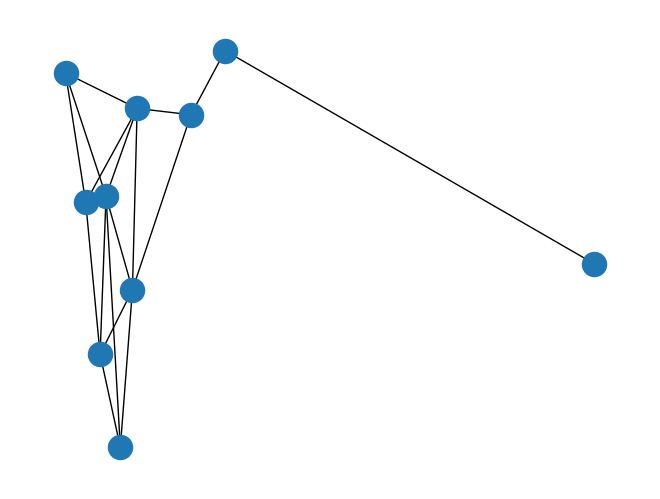

In [151]:
nx.draw(g)

In [153]:
nx.diameter(g)

4